<a href="https://colab.research.google.com/github/maskot1977/tmd2020/blob/main/hyper_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# テスト用データセットの作成

In [ ]:
import numpy as np
from sklearn.datasets import make_classification, make_moons, make_circles

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2)
X2, Y2 = make_moons(noise=0.3)
X3, Y3 = make_circles(noise=0.3, factor=0.5)
X4, Y4 = make_circles(noise=0.3, factor=0.5)
Y4 = np.array([1 if x[0] * x[1] > 0 else 0 for x in X4])

In [ ]:
def rotation(x, t, deg = False):
    if deg == True:
        t = np.deg2rad(t)
    a = np.array([[np.cos(t), -np.sin(t)],
                  [np.sin(t),  np.cos(t)]])
    ax = np.dot(a, x)        
    return ax

X1 = np.array([list(rotation(x, 45, deg=True)) for x in X1])
X2 = np.array([list(rotation(x, 45, deg=True)) for x in X2])
X3 = np.array([list(rotation(x, 45, deg=True)) for x in X3])
X4 = np.array([list(rotation(x, 45, deg=True)) for x in X4])

Dataset 1


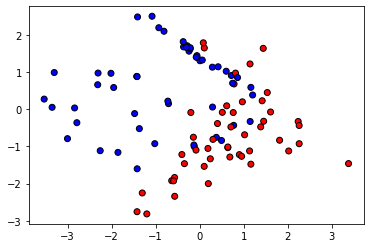

Dataset 2


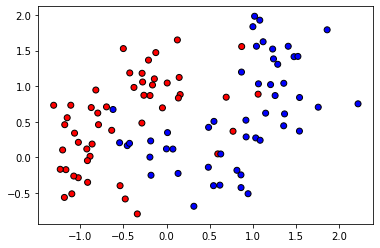

Dataset 3


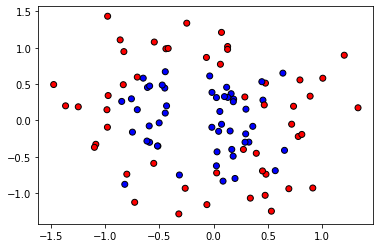

Dataset 4


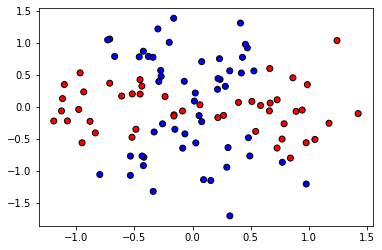

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

dataset = 0
for X, Y in zip([X1, X2, X3, X4], [Y1, Y2, Y3, Y4]):
    dataset += 1
    print("Dataset", dataset)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, edgecolors="k")
    plt.show()

# 異常値検知(abnormal values detection)

## kNN

In [ ]:
from sklearn.neighbors import NearestNeighbors

class KNN:
    def __init__(self, n_neighbors=5, out=0.05, algorithm='ball_tree'):
        self.n_neighbors = n_neighbors
        self.out = out
        self.model = False
        self.algorithm = algorithm
        self.distances = False
        self.indices = False
        self.threshold = False
        self.len_data = False
        
    def fit(self, X):
        self.len_data = len(X)
        self.model = NearestNeighbors(
            n_neighbors=self.n_neighbors, 
            algorithm=self.algorithm 
            ).fit(X)
        self.distances, self.indices = self.model.kneighbors(X)
        self.threshold = sorted(
            self.distances[:, self.n_neighbors - 1]
            )[int((self.len_data - 1) * (1 - self.out))]

    def transform(self, x):
        self.distances, self.indices = self.model.kneighbors(x)
        return self.distances[:, self.n_neighbors - 1]

    def transform_bin(self, x):
        self.transform(x)
        self.Z = self.distances[:, self.n_neighbors - 1]
        return np.where(self.Z >= self.threshold, 0, 1)

Dataset 1


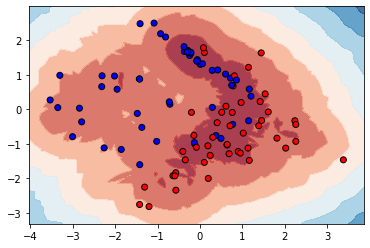

Dataset 2


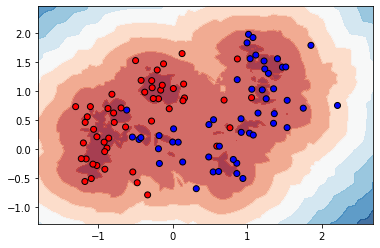

Dataset 3


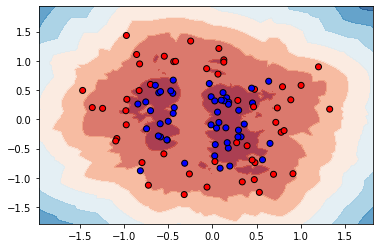

Dataset 4


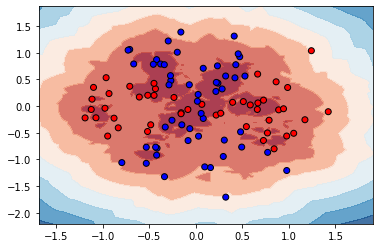

In [ ]:
h = 0.02
dataset = 0
for X, Y in zip([X1, X2, X3, X4], [Y1, Y2, Y3, Y4]):
    dataset += 1
    print("Dataset", dataset)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    avd = KNN()
    avd.fit(X)
    Z = avd.transform(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, edgecolors="k")
    plt.show()

## OCSVM

In [ ]:
from sklearn.svm import OneClassSVM
class OCSVM:
    def __init__(self, out=0.05):
        self.model = OneClassSVM()
        self.out = out
        self.threshold = False
        self.len_data = False
    
    def fit(self, X):
        self.len_data = len(X)
        self.model.fit(X)
        self.threshold = sorted(
            self.model.decision_function(X)
            )[int((self.len_data - 1) * self.out)]

    def transform(self, x):
        return self.model.decision_function(x)

    def transform_bin(self, x):
        self.Z = self.model.decision_function(x)
        return np.where(self.Z >= self.threshold, 1, 0)

Dataset 1


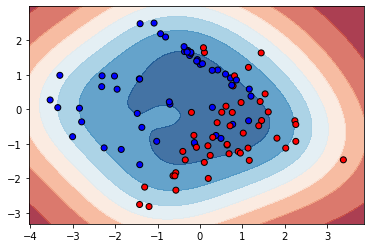

Dataset 2


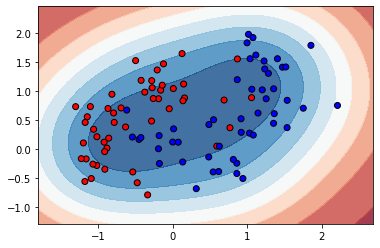

Dataset 3


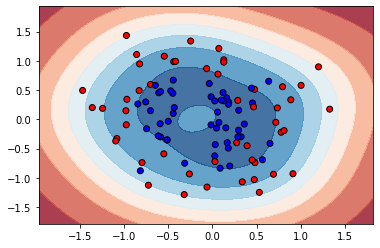

Dataset 4


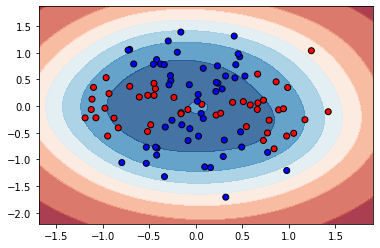

In [ ]:
h = 0.02
dataset = 0
for X, Y in zip([X1, X2, X3, X4], [Y1, Y2, Y3, Y4]):
    dataset += 1
    print("Dataset", dataset)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    avd = OCSVM()
    avd.fit(X)
    Z = avd.transform(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, edgecolors="k")
    plt.show()

# SVC

Dataset 1


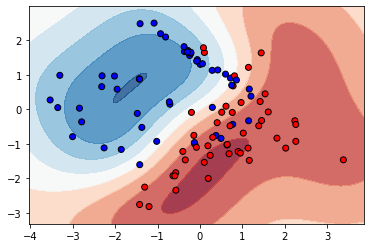

Dataset 2


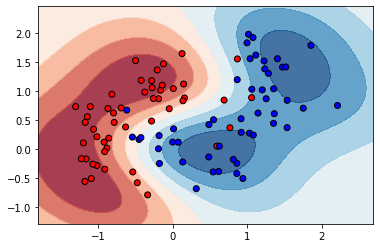

Dataset 3


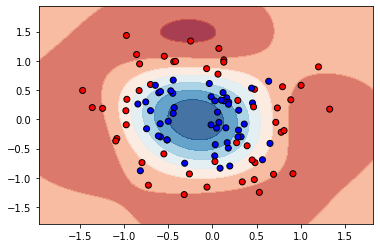

Dataset 4


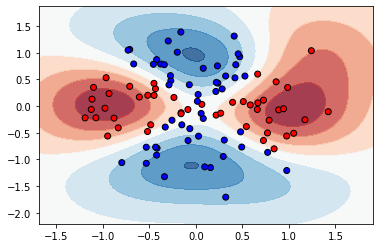

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

h = 0.02  # step size in the mesh
dataset = 0
for X, Y in zip([X1, X2, X3, X4], [Y1, Y2, Y3, Y4]):
    dataset += 1
    print("Dataset", dataset)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    model = make_pipeline(StandardScaler(), SVC())
    model.fit(X, Y)
    if hasattr(model, "decision_function"):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, edgecolors="k")
    plt.show()

# SVC+AVD

Dataset 1


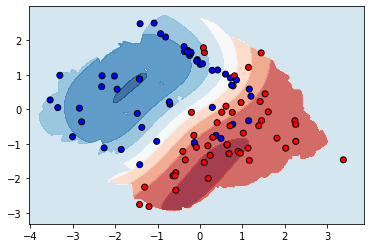

Dataset 2


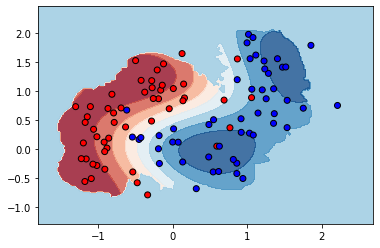

Dataset 3


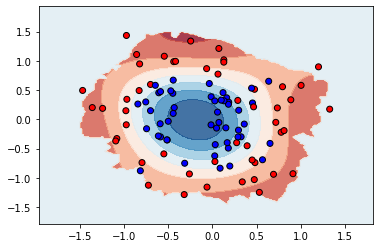

Dataset 4


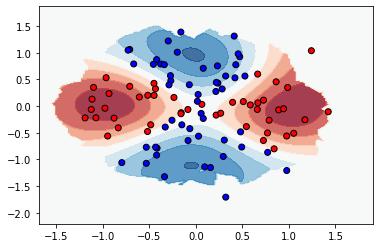

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

h = 0.02  # step size in the mesh
dataset = 0
for X, Y in zip([X1, X2, X3, X4], [Y1, Y2, Y3, Y4]):
    dataset += 1
    print("Dataset", dataset)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    model = make_pipeline(StandardScaler(), SVC())
    model.fit(X, Y)
    if hasattr(model, "decision_function"):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    avd = KNN()
    avd.fit(X)
    W = avd.transform_bin(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z - 0.5) * W + 0.5
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, edgecolors="k")
    plt.show()

Dataset 1


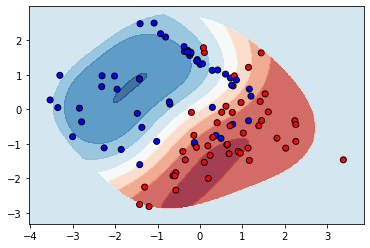

Dataset 2


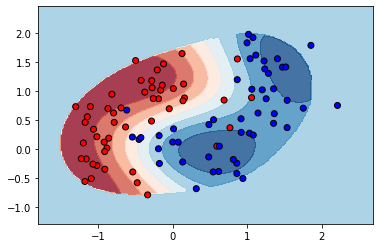

Dataset 3


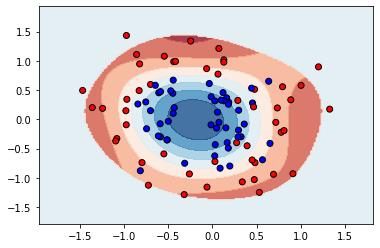

Dataset 4


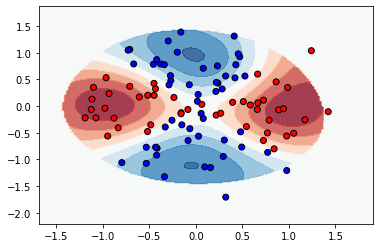

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

h = 0.02  # step size in the mesh
dataset = 0
for X, Y in zip([X1, X2, X3, X4], [Y1, Y2, Y3, Y4]):
    dataset += 1
    print("Dataset", dataset)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    model = make_pipeline(StandardScaler(), SVC())
    model.fit(X, Y)
    if hasattr(model, "decision_function"):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    avd = OCSVM()
    avd.fit(X)
    W = avd.transform_bin(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z - 0.5) * W + 0.5
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, edgecolors="k")
    plt.show()

# SVCのハイパラチューニング

In [ ]:
from sklearn.model_selection import train_test_split

dataset = 0
for X, Y in zip([X1, X2, X3, X4], [Y1, Y2, Y3, Y4]):
    dataset += 1
    print("Dataset", dataset)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    i = 0
    figure = plt.figure(figsize=(24, 24))
    C = [100, 10, 1, 0.1, 0.01, 0.001]
    G = [100, 10, 1, 0.1, 0.01, 0.001]
    for c in C:
        for g in G:
            i += 1
            ax = plt.subplot(len(C), len(G), i)
            model = make_pipeline(StandardScaler(), SVC(C=c, gamma=g))
            model.fit(X_train, Y_train)
            score = model.score(X_test, Y_test)
            if hasattr(model, "decision_function"):
                Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = Z.reshape(xx.shape)
            ax.set_title("C=" + str(c) + ", G=" + str(g))
            ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
            ax.scatter(
                X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cm_bright, edgecolors="k"
            )
            ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_bright)
            ax.text(
                xx.max() - 0.3,
                yy.min() + 0.3,
                ("%.3f" % score).lstrip("0"),
                size=15,
                horizontalalignment="right",
            )
    plt.show()

# Optuna

In [ ]:
!pip install optuna

# SVC + Optuna + AVD

In [ ]:
def objective(trial):
    c = trial.suggest_loguniform('C', 0.00001, 1000)
    g = trial.suggest_loguniform('gamma', 0.00001, 1000)
    model = make_pipeline(
        StandardScaler(), 
        SVC(C=c, gamma=g)
    )
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

Dataset 1


/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.




Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=788.1285787737057, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma=0.133264134886493, kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


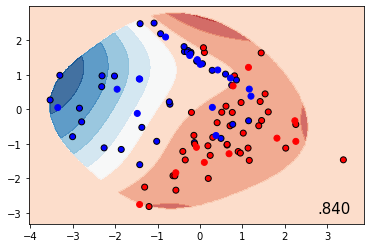

Dataset 2


/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.




Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=98.19209389219213, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma=0.41650150502020006, kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


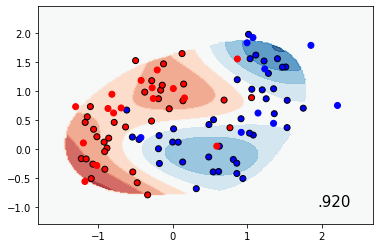

Dataset 3


/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.




Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=0.726936820754097, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma=9.092099076252524, kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


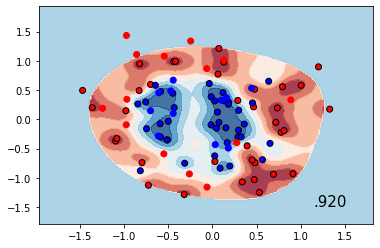

Dataset 4


/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.




Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=516.9224070571279, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma=0.8159135255627242, kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


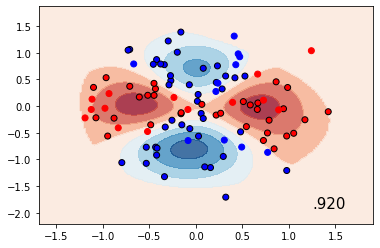

In [ ]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARN)

dataset = 0
for X, Y in zip([X1, X2, X3, X4], [Y1, Y2, Y3, Y4]):
    dataset += 1
    print("Dataset", dataset)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_train, X_test, y_train, y_test = train_test_split(X, Y)
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=500, show_progress_bar=True)

    best_model = make_pipeline(
        StandardScaler(), 
        SVC(**study.best_params)
    )
    best_model.fit(X_train, y_train)
    score = best_model.score(X_test, y_test)
    if hasattr(best_model, "decision_function"):
        Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = best_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    avd = OCSVM()
    avd.fit(X_train)
    W = avd.transform_bin(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z - 0.5) * W + 0.5
    Z = Z.reshape(xx.shape)
    print(best_model)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright)
    plt.text(
        xx.max() - 0.3, 
        yy.min() + 0.3, 
        ("%.3f" % score).lstrip("0"), 
        size=15,
        horizontalalignment="right",
    )
    plt.show()

# Random Forest + grid search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
  
dataset = 0
for X, Y in zip([X1, X2, X3, X4], [Y1, Y2, Y3, Y4]):
    dataset += 1
    print("Dataset", dataset)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    i = 0
    figure = plt.figure(figsize=(24, 24))
    D = [1, 5, 10, 20, 50]
    E = [1, 10, 100, 200, 300]
    for d in D:
        for e in E:
            i += 1
            ax = plt.subplot(len(D), len(E), i)
            model = make_pipeline(
                StandardScaler(), RandomForestClassifier(n_estimators=e, max_depth=d)
            )
            model.fit(X_train, Y_train)
            score = model.score(X_test, Y_test)
            if hasattr(model, "decision_function"):
                Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = Z.reshape(xx.shape)
            ax.set_title("D=" + str(d) + ", E=" + str(e))
            ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
            ax.scatter(
                X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cm_bright, edgecolors="k"
            )
            ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_bright)
            ax.text(
                xx.max() - 0.3,
                yy.min() + 0.3,
                ("%.3f" % score).lstrip("0"),
                size=15,
                horizontalalignment="right",
            )
    plt.show()

# Random Forest + Optuna + AVD

In [ ]:
def objective(trial):
    e = trial.suggest_int('n_estimators', 10, 100)
    d = trial.suggest_int('max_depth', 1, 30)
    model = make_pipeline(
        StandardScaler(), 
        RandomForestClassifier(
            random_state=1,
            max_depth=d,
            n_estimators=e, 
            )
    )
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

Dataset 1


/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.




Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=24, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=27, n_jobs=None,
                                        oob_score=False, random_state=1,
                                        verbose=0, warm_start=False))],
         verbose=False)

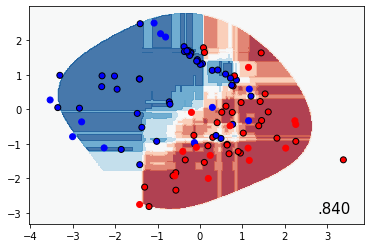

Dataset 2


/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.




Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=14, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=68, n_jobs=None,
                                        oob_score=False, random_state=1,
                                        verbose=0, warm_start=False))],
         verbose=False)

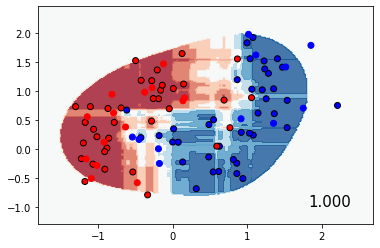

Dataset 3


/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.




Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=1, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=98, n_jobs=None,
                                        oob_score=False, random_state=1,
                                        verbose=0, warm_start=False))],
         verbose=False)


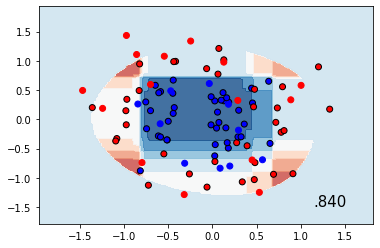

Dataset 4


/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.




Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=17, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=29, n_jobs=None,
                                        oob_score=False, random_state=1,
                                        verbose=0, warm_start=False))],
         verbose=False)

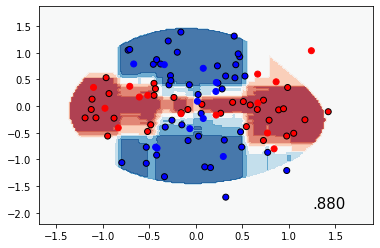

In [ ]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARN)

dataset = 0
for X, Y in zip([X1, X2, X3, X4], [Y1, Y2, Y3, Y4]):
    dataset += 1
    print("Dataset", dataset)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_train, X_test, y_train, y_test = train_test_split(X, Y)
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=500, show_progress_bar=True)

    best_model = make_pipeline(
        StandardScaler(), 
        RandomForestClassifier(
            random_state=1,
            **study.best_params
            )
    )
    best_model.fit(X_train, y_train)
    score = best_model.score(X_test, y_test)
    if hasattr(best_model, "decision_function"):
        Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = best_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    avd = OCSVM()
    avd.fit(X_train)
    W = avd.transform_bin(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z - 0.5) * W + 0.5
    Z = Z.reshape(xx.shape)
    print(best_model)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright)
    plt.text(
        xx.max() - 0.3, 
        yy.min() + 0.3, 
        ("%.3f" % score).lstrip("0"), 
        size=15,
        horizontalalignment="right",
    )
    plt.show()

# MLP + grid search

In [ ]:
from sklearn.neural_network import MLPClassifier
  
dataset = 0
for X, Y in zip([X1, X2, X3, X4], [Y1, Y2, Y3, Y4]):
    dataset += 1
    print("Dataset", dataset)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    i = 0
    figure = plt.figure(figsize=(24, 24))
    N = [2, 4, 8, 16, 32, 64]
    L = [2, 4, 8, 16, 32, 64]
    for n in N:
        for l in L:
            i += 1
            ax = plt.subplot(len(N), len(L), i)

            model = make_pipeline(
                StandardScaler(),
                MLPClassifier(
                    max_iter=2000, early_stopping=True,
                    hidden_layer_sizes=tuple([n for _ in range(l)])
                ),
            )
            model.fit(X_train, Y_train)
            score = model.score(X_test, Y_test)
            if hasattr(model, "decision_function"):
                Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = Z.reshape(xx.shape)
            ax.set_title("N=" + str(n) + ", L=" + str(l))
            ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
            ax.scatter(
                X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cm_bright, edgecolors="k"
            )
            ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_bright)
            ax.text(
                xx.max() - 0.3,
                yy.min() + 0.3,
                ("%.3f" % score).lstrip("0"),
                size=15,
                horizontalalignment="right",
            )
    plt.show()

# MLP + Optuna + AVD

In [ ]:
def objective(trial):
    layers = []
    n_layers = trial.suggest_int('n_layers', 1, 20)
    for i in range(n_layers):
        layers.append(trial.suggest_int(str(i), 10, 100))
    #learning_rate_init, = trial.suggest_loguniform('learning_rate_init', 0.001, 0.1),
    model = make_pipeline(
        StandardScaler(), 
        MLPClassifier(
            random_state=1,
            max_iter=2000, early_stopping=True,
            hidden_layer_sizes=tuple(layers),
            #learning_rate_init=learning_rate_init,
            )
    )
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

Dataset 1


/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.




Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=True, epsilon=1e-08,
                               hidden_layer_sizes=(73, 69, 80, 44, 87, 78, 90,
                                                   99, 100),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=2000, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=1, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False

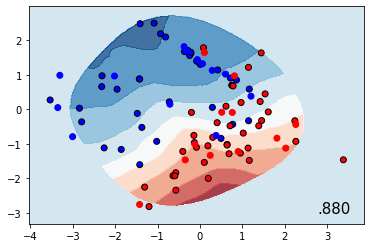

Dataset 2


/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.




Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=True, epsilon=1e-08,
                               hidden_layer_sizes=(45, 49, 20, 77, 100, 70, 22,
                                                   63, 31, 54, 60, 82, 28, 76,
                                                   10, 76, 48),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=2000, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=1, shuffle=True, solver='adam',
                               tol=0.0001, vali

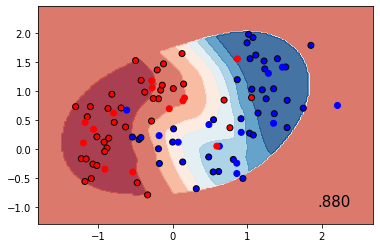

Dataset 3


/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.




Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=True, epsilon=1e-08,
                               hidden_layer_sizes=(79, 89, 48, 47, 69),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=2000, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=1, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)


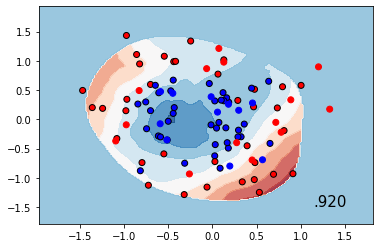

Dataset 4


/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.




Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=True, epsilon=1e-08,
                               hidden_layer_sizes=(93, 32, 92, 82, 46, 48, 93,
                                                   93, 98, 84, 24, 81, 88),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=2000, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=1, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, w

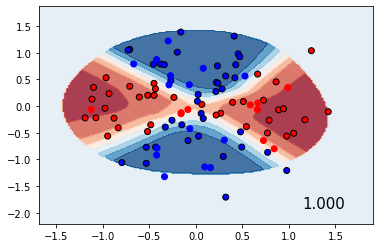

In [ ]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARN)

dataset = 0
for X, Y in zip([X1, X2, X3, X4], [Y1, Y2, Y3, Y4]):
    dataset += 1
    print("Dataset", dataset)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_train, X_test, y_train, y_test = train_test_split(X, Y)
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=250, show_progress_bar=True)

    layers = []
    n_layers = study.best_params['n_layers']
    for i in range(n_layers):
        layers.append(study.best_params[str(i)])
    best_model = make_pipeline(
        StandardScaler(), 
        MLPClassifier(
            random_state=1,
            max_iter=2000, early_stopping=True,
            hidden_layer_sizes=tuple(layers),
            )
    )
    best_model.fit(X_train, y_train)
    score = best_model.score(X_test, y_test)
    if hasattr(best_model, "decision_function"):
        Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = best_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    avd = OCSVM()
    avd.fit(X_train)
    W = avd.transform_bin(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z - 0.5) * W + 0.5
    Z = Z.reshape(xx.shape)
    print(best_model)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright)
    plt.text(
        xx.max() - 0.3, 
        yy.min() + 0.3, 
        ("%.3f" % score).lstrip("0"), 
        size=15,
        horizontalalignment="right",
    )
    plt.show()